# Introduction

- The purpose of this notebook is to demonstrate the various least squares methods for the canonical equation $Ax=b$
- The equation $Ax=b$ has many interesting applications in modern data science; however, we are often not dealing with the standard $n \times n$ matrix that is utilized in introductory linear algebra courses
- After an introductory example using an invertible matrix, we will tackle more complex $n \times m$ matrices that are not invertible
- Background material:
    - Review some introductory Linear Algebra methods such as $SVD$ in the notebook: <NOTEBOOK_NAME>

# Example: System with an Invertible Matrix
- The notes for this section were partially driven by the article: [Math for Machines: Least Squares with the Moore-Penrose Inverse](https://mathformachines.com/posts/least-squares-with-the-mp-inverse/)
- This example will demonstrate how we can apply several different methods to achieve the same results for $x1$ and $x2$ in a basic $2x2$ matrix.
- The system of equations will be:

$$
\begin{align}
x_1 - \frac{1}{2}x_2 =1 \\
-\frac{1}{2}x_1 + x_2 = -1
\end{align}
$$

## Matrix Inverse via Gaussian Elimination

Let's solve a simple system of equations. This example is a system with an invertible matrix. We can find the inverse of A, and then solving we find $x_1 = \frac{2}{3}$ and $x_2 = -\frac{2}{3}$. 
First, let's create matrix $A$, which is simply the system of equations in augmented matrix form. Recall, the inverse, $A^{-1}$, can be found by applying Gaussian Elimination to $A$ and then multiplying by $b$

$$\begin{align}
A = \begin{bmatrix} 1 & -\frac{1}{2} \\ \frac{1}{2} & 1\end{bmatrix} \,, A^{-1} = \begin{bmatrix} \frac{4}{3} & \frac{2}{3} \\ \frac{2}{3} & \frac{4}{3}\end{bmatrix}
\end{align}$$

$$\begin{align}
x = A^{-1}b &= \begin{bmatrix} \frac{4}{3} & \frac{2}{3} \\ \frac{2}{3} & \frac{4}{3}\end{bmatrix} \begin{bmatrix} 1 \\ -1 \end{bmatrix} \\ 
&= \begin{bmatrix} \frac{2}{3} \\ -\frac{2}{3}\end{bmatrix}
\end{align}$$

## SVD
-[Medium: Least Squares Linear Regression In Python](https://towardsdatascience.com/least-squares-linear-regression-in-python-54b87fc49e77)

In [1]:
y = [1,-1] # create y values
A = np.array([[1., -0.5], [-0.5, 1]]) # create matrix A

In [11]:
u, s, vh = np.linalg.svd(A, full_matrices=True)
D_plus = np.diag(np.hstack([1/s[:1], np.zeros(2-1)]))
v = vh.T
X_plus = v.dot(D_plus).dot(u.T)
w = X_plus.dot(y)
w

array([ 0.66666667, -0.66666667])

## Moore-Penrose (MP)
- [What is the Pseudo-Inverse or A^dagger?](https://www.youtube.com/watch?v=EeY5a5who_s)
- [Using the Moore-Penrose Pseudoinverse to Solve Linear Equations](https://www.youtube.com/watch?v=5bxsxM2UTb4)
- Moore-Penrose solves the least-squares problem for an over-determined system of equations (i.e. m>n, rows > columns)
    - The notation
- $A^\dagger \, A = I$ however $A \, A^\dagger \ne I$
     - Unless A has the usual inverse


How can we solve the least squares problem using MP?
$$
\begin{align}
\vec{b} &= A\vec{x} \\
A^\dagger \vec{b} &= A^\dagger A \vec{x} \\
A^\dagger \vec{b} &= I \vec{x} \\
A^\dagger \vec{b} &= \vec{x}
\end{align}
$$

We used the canonical equation $A\vec{x} = \vec{b}$ and then introduced the MP variable and we were able to isolate $x$.  The code below demonstrates that we receive the anticipated output.

In [723]:
# this is the same as A^\dagger b = x
np.linalg.pinv([[1,-0.5],[-0.5,1]]) @ [1,-1] # "@" is the same as np.matmul

array([0.67, -0.67])

## Programatic Solution Using np.linalg.inv

In [506]:
# set numpy print options
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [520]:
y = [1,-1] # create y values
A = np.array([[1., -0.5], [-0.5, 1]]) # create matrix A
A_inv = np.linalg.inv(A) # calculate inverse

In [521]:
np.matmul(A_inv,y) # this output matches

array([0.67, -0.67])

## sklearn LinearRegression().fit() 

In [540]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
X = np.array([[1, -0.5], [-0.5, 1]])
y = [1,-1]

In [542]:
# Sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(X,y)
reg.coef_

array([0.67, -0.67])

# Example 2: Singular Matrix (i.e. not invertible)

In [673]:
# Generate x values via linspace
x = np.linspace(start = 0, stop = 4, num=100)

In [674]:
# Create y-values (i.e. output)
y_values = []
mu, sigma = 0, 0.1

for i in x:
    y_values.append((i**2)+ np.random.normal(mu,sigma)) # x values + random number with mean = 0 and sigma = 0.1

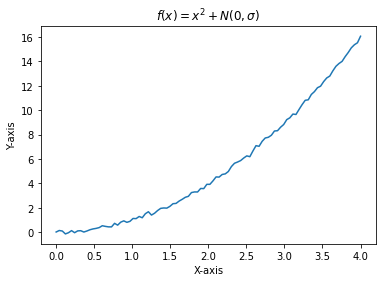

In [675]:
# Create plot
plt.plot(np.linspace(start = 0, stop = 4, num=100), y_values)
plt.title('$f(x) = x^2 + N(0, \sigma)$')
plt.xlabel('X-axis'), plt.ylabel('Y-axis')
plt.show()

In [714]:
# Create matrix A (a 100x20 matrix) where each row is a 20 term polynomial
A = np.ndarray(shape=(100,20), dtype=float) # initialize matrix

for i in range(0,20):
    for j in range(0,100):
        A[j,i] = x[j]**(i)

In [717]:
#pd.DataFrame(A)

In [720]:
(np.linalg.pinv(A) * y_values)[:,47]

array([0.07, -3.35, 28.06, -81.00, 77.99, 27.12, -65.42, -29.62, 55.58,
       31.39, -55.83, -14.07, 64.98, -55.45, 26.05, -7.77, 1.51, -0.19,
       0.01, -0.00])

In [705]:
reg = LinearRegression(fit_intercept=False).fit(A, y_values)
sk_coefs = reg.coef_.reshape(-1,1)
sk_coefs

array([[0.07],
       [0.15],
       [-9.54],
       [55.00],
       [-107.58],
       [70.51],
       [44.89],
       [-72.30],
       [-20.61],
       [70.64],
       [-10.62],
       [-59.89],
       [68.60],
       [-39.86],
       [14.66],
       [-3.60],
       [0.59],
       [-0.06],
       [0.00],
       [-0.00]])

In [687]:
def least_squares(mu, sigma, j, x, A, j2):
    fn = np.zeros((j,1))
    
    for i in range(0, j):
        fn[i] = (x[i]**2 + np.random.normal(mu, sigma))
    
    coeffs1 = []
    for i in range(0, j2):
        an = np.matmul(np.linalg.pinv(A), fn)
        coeffs1.append(an[i][0])
    
    # Sklearn
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression(fit_intercept=False).fit(A, fn)
    sk_coefs = reg.coef_.reshape(-1,1)
    
    return [coeffs1, sk_coefs]

In [688]:
test = least_squares(mu, sigma, 100, x, A, 20)


In [691]:
for i in range(0, 10):
    print(i,": ", test[0][i], "   ", test[1][i][0], "\n")

0 :  0.1712428707468744     0.2281173571717213 

1 :  -4.833165342183369     -8.491939956738417 

2 :  28.956405949506106     69.0598411592217 

3 :  -61.45916989032648     -228.30982779543498 

4 :  43.474680931583066     355.2267835197443 

5 :  25.003361210325174     -186.24403433879715 

6 :  -33.31075008633522     -153.22357667087826 

7 :  -22.40489962363602     197.45431348545293 

8 :  26.129290174069837     70.76688808675172 

9 :  20.53311791788773     -196.85256610570423 



In [431]:
coeffs1 = least_squares(mu, sigma, 100, x, A, 20)
coeffs2 = least_squares(mu, sigma, 100, x, A, 20)
coeffs3 = least_squares(mu, sigma, 100, x, A, 20)
coeffs4 = least_squares(mu, sigma, 100, x, A, 20)

x_range = range(0,20)

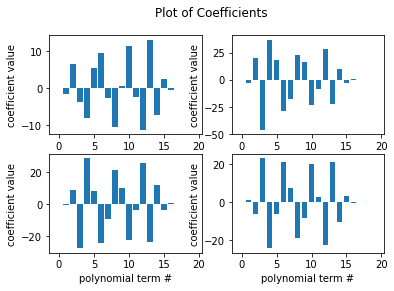

In [432]:
fig, axs = plt.subplots(2, 2)
axs[0,0].bar(x_range,coeffs1)
axs[0,1].bar(x_range,coeffs2)
axs[1,0].bar(x_range,coeffs3)
axs[1,1].bar(x_range,coeffs4)

fig.suptitle('Plot of Coefficients')


for ax in axs.flat:
    ax.set(xlabel='polynomial term #', ylabel='coefficient value')
    
plt.show()

## Matrix Inverse via Gaussian Elimination

## LU Decomposition

## Cholesky Decomposition

## Moore-Penrose (MP)

## Programatic Solution Using np.linalg.inv

## sklearn LinearRegression.fit()

# Bayesian Least Squares Approach
- Let's solve the same system of equations from sections 2 and 3 using Bayesian Statistics

## System with an Invertible Matrix

## System without an Invertible Matrix